In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

### Random number generator

In [2]:
# gen = scipy.stats.uniform(
#     loc=-scipy.stats.uniform.mean(scale=1/scipy.stats.uniform.std()), 
#     scale=1/scipy.stats.uniform.std()
# )
gen = scipy.stats.norm

assert gen.mean() == 0.0, 'Random generator should be centered.'
assert gen.std() == 1.0, 'Random generator should be of unit variance.'

## Wigner's semi-circle law

In [3]:
N = 500
A = np.empty((N, N))
A[np.triu_indices(N, 1)] = gen.rvs(size=N*(N-1)//2)
A[np.tril_indices(N, -1)] = A.T[np.tril_indices(N, -1)]
A[np.diag_indices(N)] = gen.rvs(size=N) 
A /= np.sqrt(N)

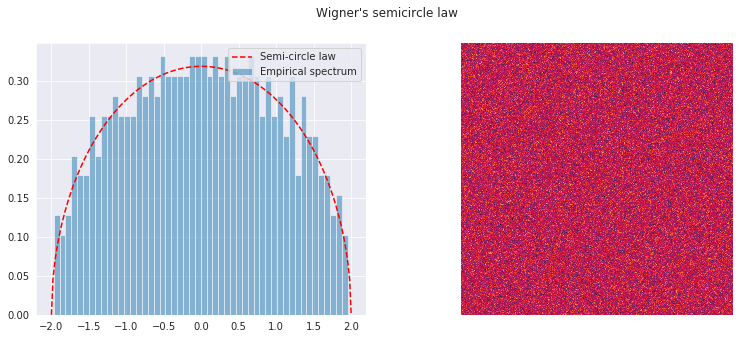

In [4]:
spectrum = np.linalg.eigvalsh(A)
xx = np.linspace(-2, 2, 200)

with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(figsize=(13, 5), nrows=1, ncols=2)
    fig.suptitle("Wigner's semicircle law")
    
    ax = axes[0]
    ax.hist(spectrum, bins=50, density=True, label='Empirical spectrum', alpha=0.5)
    ax.plot(xx, scipy.stats.semicircular.pdf(xx, scale=2), color='r', linestyle='dashed', label='Semi-circle law')
    ax.legend(loc='upper right')

    ax = axes[1]
    ax.imshow(A)
    ax.axis('off')
    
plt.show()

## Marcenko-Pastur

In [5]:
N = 500
n = 5000
c = N/n
lambda_minus = (1 - np.sqrt(c)) ** 2
lambda_plus = (1 + np.sqrt(c)) ** 2

X = gen.rvs(size=N*n).reshape(N, n)
A = np.dot(X, X.T)/n

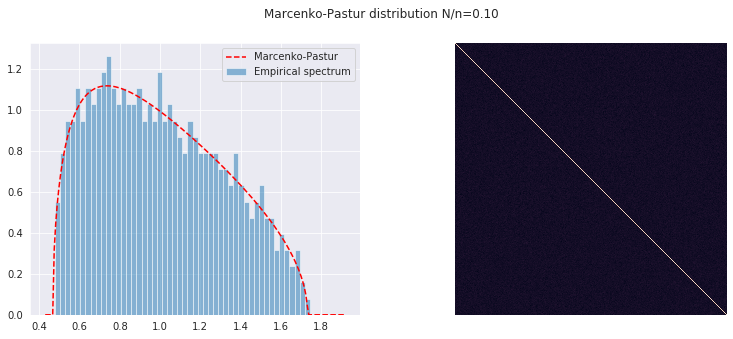

In [6]:
spectrum = np.linalg.eigvalsh(A)
xx = np.linspace(np.min(spectrum) * 0.9, np.max(spectrum) * 1.1, 200)
marcenko_pastur_pdf = lambda x: np.sqrt((lambda_plus-x)*(x-lambda_minus))/(2*np.pi*c*x) if x > lambda_minus and x < lambda_plus else 0.0

with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(figsize=(13, 5), nrows=1, ncols=2)
    fig.suptitle('Marcenko-Pastur distribution N/n={:.2f}'.format(c))

    ax = axes[0]
    ax.hist(spectrum, bins=50, density=True, label='Empirical spectrum', alpha=0.5)
    ax.plot(xx, list(map(marcenko_pastur_pdf, xx)), color='r', linestyle='dashed', label='Marcenko-Pastur')
    ax.legend(loc='upper right')

    ax = axes[1]
    ax.imshow(A)
    ax.axis('off')
    
plt.show()

## Large covariance matrix

In [7]:
N = 500
n = 5000
c = N/n
lambda_minus = (1 - np.sqrt(c)) ** 2
lambda_plus = (1 + np.sqrt(c)) ** 2

std_pop = [0.2, 0.5, 0.8]
std_pop_distr = [1/3, 1/3, 1/3]
cov_pop_sqrt = np.diag(np.random.choice(std_pop, p=std_pop_distr, size=N) ** (0.5))

X = gen.rvs(size=N*n).reshape(N, n)
Y = np.dot(cov_pop_sqrt, X)
A = np.dot(Y, Y.T)/n

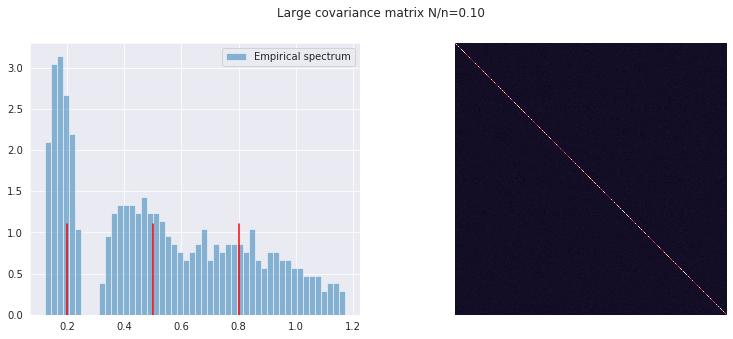

In [8]:
spectrum = np.linalg.eigvalsh(A)
xx = np.linspace(np.min(spectrum) * 0.9, np.max(spectrum) * 1.1, 200)
marcenko_pastur_pdf = lambda x: np.sqrt((lambda_plus-x)*(x-lambda_minus))/(2*np.pi*c*x) if x > lambda_minus and x < lambda_plus else 0.0

with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(figsize=(13, 5), nrows=1, ncols=2)
    fig.suptitle('Large covariance matrix N/n={:.2f}'.format(c))

    ax = axes[0]
    ax.hist(spectrum, bins=50, density=True, label='Empirical spectrum', alpha=0.5)

    for std, freq in zip(std_pop, std_pop_distr):
        ax.axvline(x=std, ymax=freq, color='r')
    ax.legend(loc='upper right')

    ax = axes[1]
    ax.imshow(A)
    ax.axis('off')

plt.show()

### General case

In [9]:
N = 500
A = gen.rvs(size=N**2).reshape(N, N) / np.sqrt(N)

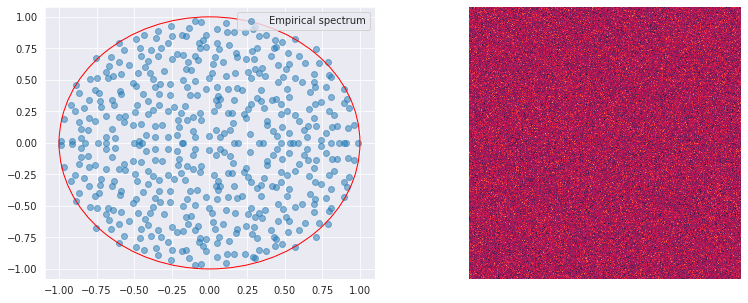

In [10]:
spectrum = np.linalg.eigvals(A)
x, y = np.real(spectrum), np.imag(spectrum)

with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(figsize=(13, 5), nrows=1, ncols=2)

    ax = axes[0]
    ax.scatter(x, y, label='Empirical spectrum', alpha=0.5)
    circle = plt.Circle((0, 0), 1.0, fill=False, color='r', label='Unit circle')
    ax.add_artist(circle)
    ax.legend(loc='upper right')
    
    ax = axes[1]
    ax.imshow(A) 
    ax.axis('off')

plt.show()